# Assignment 3
### Import & get info from files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pandas import read_csv

In [3]:
file_trade = 'OECD_Trade.csv'
file_gdp = 'OECD_GDP.csv'

In [4]:
oecd_trade = read_csv(file_trade, header=0, encoding='UTF-8')
oecd_gdp = read_csv(file_gdp, header=0, encoding='UTF-8')

In [5]:
print(oecd_trade.shape)
print(oecd_trade.count())
print(oecd_trade.dtypes)
print(oecd_trade.nunique())
oecd_trade.head()

(29222, 19)
LOCATION                 29222
Reporter country         29222
FLOW                     29222
Flow                     29222
PARTNER                  29222
Partner country          29222
FREQUENCY                29222
Frequency                29222
TIME                     29222
Time                     29222
Unit Code                29222
Unit                     29222
PowerCode Code           29222
PowerCode                29222
Reference Period Code        0
Reference Period             0
Value                    29222
Flag Codes                   0
Flags                        0
dtype: int64
LOCATION                  object
Reporter country          object
FLOW                      object
Flow                      object
PARTNER                   object
Partner country           object
FREQUENCY                 object
Frequency                 object
TIME                       int64
Time                       int64
Unit Code                 object
Unit                   

,LOCATION,Reporter country,FLOW,Flow,PARTNER,Partner country,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2011,2011,USD,US Dollar,0,Units,NaN,NaN,73144918,NaN,NaN
1,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2012,2012,USD,US Dollar,0,Units,NaN,NaN,71483059,NaN,NaN
2,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2013,2013,USD,US Dollar,0,Units,NaN,NaN,67897422,NaN,NaN
3,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2014,2014,USD,US Dollar,0,Units,NaN,NaN,61114752,NaN,NaN
4,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2015,2015,USD,US Dollar,0,Units,NaN,NaN,54730242,NaN,NaN


In [6]:
print(oecd_gdp.shape)
print(oecd_gdp.count())
print(oecd_gdp.dtypes)
print(oecd_gdp.nunique())
oecd_gdp.head()

(345, 17)
LOCATION                 345
Country                  345
TRANSACT                 345
Transaction              345
MEASURE                  345
Measure                  345
TIME                     345
Year                     345
Unit Code                345
Unit                     345
PowerCode Code           345
PowerCode                345
Reference Period Code      0
Reference Period           0
Value                    345
Flag Codes                23
Flags                     23
dtype: int64
LOCATION                  object
Country                   object
TRANSACT                  object
Transaction               object
MEASURE                   object
Measure                   object
TIME                       int64
Year                       int64
Unit Code                 object
Unit                      object
PowerCode Code             int64
PowerCode                 object
Reference Period Code    float64
Reference Period         float64
Value                 

,LOCATION,Country,TRANSACT,Transaction,MEASURE,Measure,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2010,2010,USD,US Dollar,6,Millions,NaN,NaN,1.299463e+06,NaN,NaN
1,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2011,2011,USD,US Dollar,6,Millions,NaN,NaN,1.546689e+06,NaN,NaN
2,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2012,2012,USD,US Dollar,6,Millions,NaN,NaN,1.590708e+06,NaN,NaN
3,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2013,2013,USD,US Dollar,6,Millions,NaN,NaN,1.543216e+06,NaN,NaN
4,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2014,2014,USD,US Dollar,6,Millions,NaN,NaN,1.464256e+06,NaN,NaN


In [7]:
# check number of data per country
oecd_trade_countries = oecd_trade.groupby(['Reporter country'])
print(oecd_trade_countries.size())

oecd_trade_partners = oecd_trade.groupby(['Partner country'])
print(oecd_trade_partners.size())

oecd_gdp_countries = oecd_gdp.groupby('Country')
print(oecd_gdp_countries.size())

Reporter country
Australia                        760
Austria                          610
Belgium                          840
Canada                           854
Chile                            814
Czech Republic                   750
Denmark                          846
Estonia                          819
European Union (28 countries)    370
Finland                          846
France                           837
Germany                          752
Greece                           839
Hungary                          846
Iceland                          777
Ireland                          854
Israel                           726
Italy                            846
Japan                            843
Korea                            564
Latvia                           816
Lithuania                        835
Luxembourg                       732
Mexico                           831
Netherlands                      658
New Zealand                      725
Norway               

### Clean OECD_trade

In [8]:
# Drop unnecessary columns
columns_trade = ['LOCATION', 'FLOW', 'PARTNER', 'FREQUENCY', 'Frequency', 'TIME', 'Unit', 'Unit Code', 'PowerCode Code', 'PowerCode', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags']
oecd_trade_cleaned = oecd_trade.drop(labels=columns_trade, axis=1)

# Rename columns (all capitalize + no space)
oecd_trade_cleaned = oecd_trade_cleaned.rename(columns={"Reporter country": "COUNTRY", "Flow": "FLOW", "Partner country": "PARTNER", "Time": "YEAR","Value": "VALUE"})

In [9]:
# Drop European Union from country
oecd_trade_cleaned = oecd_trade_cleaned.loc[oecd_trade_cleaned['COUNTRY'] != 'European Union (28 countries)']

# Drop OECD-Total from partner
oecd_trade_cleaned = oecd_trade_cleaned.loc[oecd_trade_cleaned['PARTNER'] != 'OECD - Total']

# Drop G20 from partner
oecd_trade_cleaned = oecd_trade_cleaned.loc[oecd_trade_cleaned['PARTNER'] != 'G20']


In [10]:
# Reset index
oecd_trade_cleaned = oecd_trade_cleaned.reset_index(drop=True)

In [11]:
# checking
print(oecd_trade.shape[0] - 370 - 582 - 542) # check: 29222 rows in original data, 370 rows of EU data, 582 OECD data,542 G20 data
print(oecd_trade_cleaned.shape)
print(oecd_trade_cleaned.dtypes)

oecd_trade_cleaned

27728
(27728, 5)
COUNTRY    object
FLOW       object
PARTNER    object
YEAR        int64
VALUE       int64
dtype: object


,COUNTRY,FLOW,PARTNER,YEAR,VALUE
0,Australia,Exports,Austria,2011,73144918
1,Australia,Exports,Austria,2012,71483059
2,Australia,Exports,Austria,2013,67897422
3,Australia,Exports,Austria,2014,61114752
4,Australia,Exports,Austria,2015,54730242
...,...,...,...,...,...
27723,Ireland,Imports,Ireland,2016,194655059
27724,New Zealand,Exports,Luxembourg,2017,1566796
27725,Estonia,Exports,Costa Rica,2017,252962
27726,Estonia,Exports,Costa Rica,2018,240915


### Clean OECD_GDP

In [12]:
# Drop unnecessary columns
columns_gdp = ['LOCATION', 'TRANSACT', 'Transaction', 'MEASURE', 'Measure','TIME', 'Unit', 'Unit Code', 'PowerCode Code', 'PowerCode', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags']
oecd_gdp_cleaned = oecd_gdp.drop(labels=columns_gdp, axis=1)

In [13]:
# Rename columns (all capitalize + no space)
oecd_gdp_cleaned = oecd_gdp_cleaned.rename(columns={"Country": "COUNTRY", "Year": "YEAR", "Value": "VALUE"})

# drop European Union from country
oecd_gdp_cleaned = oecd_gdp_cleaned.loc[oecd_gdp_cleaned['COUNTRY'] != 'European Union (28 countries)']

In [14]:
# Multiply values by 1,000,000
oecd_gdp_cleaned['VALUE'] = oecd_gdp_cleaned['VALUE'] * 1_000_000

In [15]:
# Reset index
oecd_gdp_cleaned = oecd_gdp_cleaned.reset_index(drop=True)

In [16]:
# checking
print(oecd_gdp.shape[0] - 9) # check: 345 rows in original data, 9 rows of EU data
print(oecd_gdp_cleaned.shape)
print(oecd_gdp_cleaned.dtypes)

oecd_gdp_cleaned

336
(336, 3)
COUNTRY     object
YEAR         int64
VALUE      float64
dtype: object


,COUNTRY,YEAR,VALUE
0,Australia,2010,1.299463e+12
1,Australia,2011,1.546689e+12
2,Australia,2012,1.590708e+12
3,Australia,2013,1.543216e+12
4,Australia,2014,1.464256e+12
...,...,...,...
331,Brazil,2012,2.465228e+12
332,Brazil,2013,2.472819e+12
333,Brazil,2014,2.456044e+12
334,Brazil,2015,1.802212e+12


### Export cleaned data to csv files

In [17]:
file_trade = 'OECD_Trade_Cleaned.csv'
oecd_trade_cleaned.to_csv(file_trade, index=False)

file_gdp = 'OECD_GDP_Cleaned.csv'
oecd_gdp_cleaned.to_csv(file_gdp, index=False)

## Task 3

### Part 1: Total Annual Exports

In [18]:
# Make a copy of trade data filtering for exports data only
country_exports = oecd_trade_cleaned[oecd_trade_cleaned['FLOW'] == 'Exports'].copy()

# Convert value into per trillion USD (for better visibility when graphing)
country_exports['VALUE'] = country_exports['VALUE'] / 1_000_000_000_000

# Sum up each country exports for each year
country_exports = country_exports.groupby(['COUNTRY', 'YEAR'])['VALUE'].sum()

# Unstack the dataframe to have year as the rows and each country as a column
# Fill in 0 for empty/missing data
country_exports = country_exports.unstack(level='COUNTRY').fillna(0)
country_exports

COUNTRY,Australia,Austria,Belgium,Canada,Chile,Czech Republic,Denmark,Estonia,Finland,France,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
YEAR,,,,,,,,,,,,,,,,,,,,,
2010,0.000000,0.131927,0.375036,0.368100,0.061601,0.123391,0.085276,0.010603,0.058424,0.430204,...,0.140967,0.041581,0.061372,0.019127,0.207237,0.140031,0.170105,0.069500,0.338888,1.032331
2011,0.198604,0.155470,0.435607,0.429205,0.070638,0.151464,0.100818,0.015110,0.066015,0.497171,...,0.170307,0.049899,0.073906,0.022716,0.245393,0.160852,0.201658,0.082319,0.410198,1.195084
2012,0.186369,0.145532,0.405420,0.432074,0.067715,0.145132,0.095428,0.014660,0.060702,0.470297,...,0.160579,0.047463,0.075930,0.020949,0.231710,0.152365,0.193257,0.083572,0.380659,1.249956
2013,0.182207,0.153113,0.420562,0.433446,0.066118,0.148659,0.098954,0.015343,0.063752,0.477906,...,0.176083,0.050995,0.080163,0.022784,0.246840,0.149305,0.195436,0.086834,0.432912,1.269933
2014,0.173680,0.040708,0.420813,0.451376,0.064517,0.160450,0.090030,0.016507,0.065645,0.478316,...,0.191410,0.052293,0.080071,0.024280,0.260538,0.146585,0.205067,0.092589,0.438197,1.310486
2015,0.130161,0.134094,0.361528,0.422138,0.053278,0.145658,0.075428,0.013089,0.053093,0.416730,...,0.174449,0.046933,0.069812,0.020803,0.233631,0.125670,0.231193,0.088419,0.399583,1.228295
2016,0.131365,0.134143,0.356208,0.372778,0.053026,0.151040,0.075154,0.012698,0.051167,0.416212,...,0.175249,0.048036,0.072269,0.024316,0.237353,0.125925,0.255760,0.087852,0.350418,1.190416
2017,0.159232,0.000000,0.388296,0.403712,0.060061,0.000000,0.077903,0.014096,0.059394,0.443440,...,0.199926,0.053783,0.077597,0.024947,0.262696,0.138454,0.250996,0.094861,0.374292,1.271982
2018,0.188721,0.000000,0.422469,0.430343,0.066924,0.186367,0.081503,0.016142,0.065996,0.424284,...,0.237305,0.059846,0.087469,0.028591,0.000000,0.150657,0.260556,0.107347,0.417784,1.366774


#### 1. Stacked area chart - Total Annual exports for each country for each year from 2010 to 2018

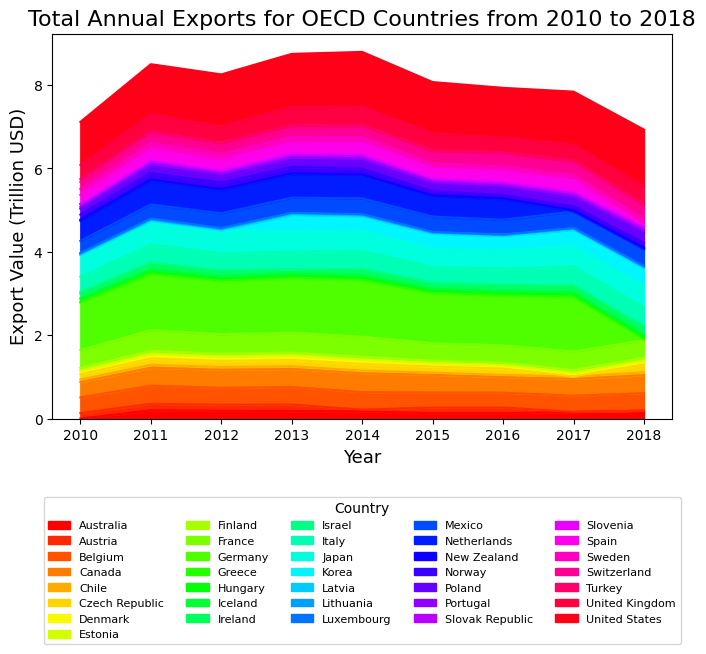

In [37]:
# Create subplot & adjust sizes
fig_1_ex, ax = plt.subplots(figsize=(8,5))

# Plot the unstacked exports data (colormap - map each country to a different color)
country_exports.plot(kind='area', stacked=True, ax=ax, colormap='hsv')

# Add titles, labels, legends and adjust fontsize
ax.set_title('Total Annual Exports for OECD Countries from 2010 to 2018', fontsize=16)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Export Value (Trillion USD)', fontsize=13)
ax.legend(title='Country', fontsize=8, bbox_to_anchor=(0.5, -0.6), loc='lower center', ncol=5)

# Set y-axis starting from 0
plt.xticks(rotation=0)
ax.set_ylim(bottom=0)

# Show the chart
plt.show()

# Save chart
fig_1_ex.savefig("exports-stacked-area-chart.png")

#### 2. Stacked bar chart - Total Annual exports for each country for each year from 2010 to 2018

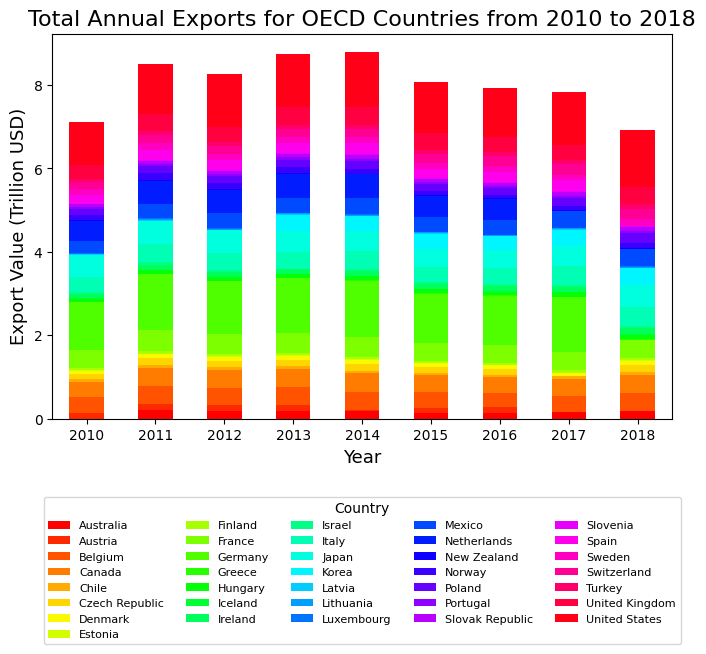

In [38]:
# Create subplot & adjust sizes
fig_2_ex, ax = plt.subplots(figsize=(8,5))

# Plot the unstacked exports data (colormap - map each country to a different color)
country_exports.plot(kind='bar', stacked=True, ax=ax, colormap='hsv')

# Add titles, labels, legends and adjust fontsize
ax.set_title('Total Annual Exports for OECD Countries from 2010 to 2018', fontsize=16)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Export Value (Trillion USD)', fontsize=13)
ax.legend(title='Country', fontsize=8, bbox_to_anchor=(0.5, -0.6), loc='lower center', ncol=5)

# Set y-axis starting from 0
plt.xticks(rotation=0)
ax.set_ylim(bottom=0)

# Show the chart
plt.show()

# Save chart
fig_2_ex.savefig("exports-stacked-bar-chart.png")

#### 3. Normalized stacked bar chart - Total Annual exports for each country for each year from 2010 to 2018

In [30]:
# Create a copy of the exports data
country_exports_norm = country_exports.copy()

# Add a column 'TOTAL' to sum all country imports by year
country_exports_norm['TOTAL'] = country_exports_norm.sum(axis=1)

# Loop through data to return the % imports of each country/total imports of all country each year
for country in country_exports_norm:
     country_exports_norm[country] = (country_exports_norm[country] / country_exports_norm['TOTAL']) * 100

# Remove column 'TOTAL'
country_exports_norm.drop('TOTAL', axis=1, inplace=True)

country_exports_norm

COUNTRY,Australia,Austria,Belgium,Canada,Chile,Czech Republic,Denmark,Estonia,Finland,France,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
YEAR,,,,,,,,,,,,,,,,,,,,,
2010,0.000000,1.854784,5.272710,5.175197,0.866064,1.734788,1.198919,0.149071,0.821392,6.048339,...,1.981882,0.584590,0.862836,0.268908,2.913593,1.968728,2.391538,0.977112,4.764499,14.513770
2011,2.337322,1.829691,5.126547,5.051202,0.831315,1.782544,1.186505,0.177829,0.776916,5.851076,...,2.004296,0.587248,0.869779,0.267337,2.887961,1.893019,2.373256,0.968796,4.827511,14.064636
2012,2.258363,1.763514,4.912760,5.235743,0.820549,1.758668,1.156364,0.177647,0.735572,5.698924,...,1.945851,0.575145,0.920096,0.253859,2.807792,1.846309,2.341833,1.012698,4.612716,15.146595
2013,2.083752,1.751024,4.809609,4.956958,0.756141,1.700090,1.131650,0.175470,0.729083,5.465404,...,2.013708,0.583191,0.916760,0.260561,2.822901,1.707471,2.235039,0.993043,4.950845,14.523157
2014,1.975429,0.463006,4.786302,5.133924,0.733816,1.824943,1.023993,0.187752,0.746643,5.440339,...,2.177089,0.594781,0.910719,0.276164,2.963342,1.667251,2.332422,1.053097,4.984026,14.905384
2015,1.613311,1.662062,4.481044,5.232287,0.660368,1.805391,0.934903,0.162236,0.658079,5.165246,...,2.162251,0.581726,0.865301,0.257844,2.895797,1.557646,2.865571,1.095935,4.952715,15.224367
2016,1.656528,1.691559,4.491820,4.700773,0.668669,1.904630,0.947701,0.160123,0.645225,5.248484,...,2.209917,0.605739,0.911319,0.306630,2.993050,1.587931,3.225165,1.107821,4.418811,15.011296
2017,2.031271,0.000000,4.953350,5.150016,0.766179,0.000000,0.993779,0.179813,0.757670,5.656807,...,2.550392,0.686094,0.989881,0.318238,3.351117,1.766207,3.201866,1.210114,4.774711,16.226227
2018,2.724210,0.000000,6.098382,6.212035,0.966059,2.690222,1.176499,0.233010,0.952660,6.124579,...,3.425512,0.863875,1.262622,0.412717,0.000000,2.174746,3.761145,1.549565,6.030748,19.729509


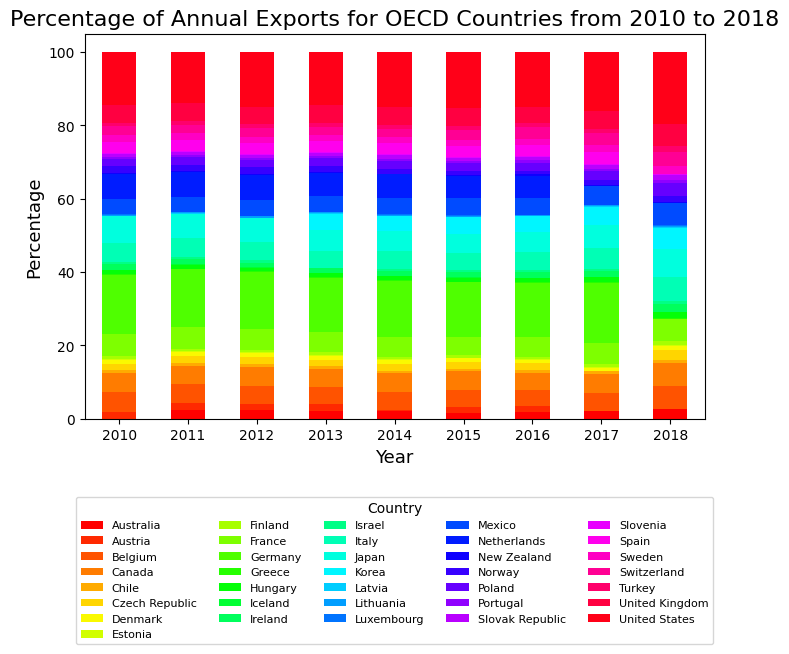

In [39]:
# Create subplot & adjust sizes
fig_3_ex, ax = plt.subplots(figsize=(8,5))

# Plot the unstacked exports data (colormap - map each country to a different color)
country_exports_norm.plot(kind='bar', stacked=True, ax=ax, colormap='hsv')

# Add titles, labels, legends and adjust fontsize
ax.set_title('Percentage of Annual Exports for OECD Countries from 2010 to 2018', fontsize=16)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Percentage', fontsize=13)
ax.legend(title='Country', fontsize=8, bbox_to_anchor=(0.5, -0.6), loc='lower center', ncol=5)

# Set y-axis starting from 0
plt.xticks(rotation=0)
ax.set_ylim(bottom=0)

# Show the chart
plt.show()

# Save chart
fig_3_ex.savefig("exports-norm-stacked-bar-chart.png")

### Part 2: Total Annual Imports

In [21]:
# Make a copy of trade data filtering for exports data only
country_imports = oecd_trade_cleaned[oecd_trade_cleaned['FLOW'] == 'Imports'].copy()

# Convert value into per trillion USD (for better visibility when graphing)
country_imports['VALUE'] = country_imports['VALUE'] / 1_000_000_000_000

# Sum up each country exports for each year
country_imports = country_imports.groupby(['COUNTRY', 'YEAR'])['VALUE'].sum()

# Unstack the dataframe to have year as the rows and each country as a column
# Fill in 0 for empty/missing data
country_imports = country_imports.unstack(level='COUNTRY').fillna(0)
country_imports

COUNTRY,Australia,Austria,Belgium,Canada,Chile,Czech Republic,Denmark,Estonia,Finland,France,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
YEAR,,,,,,,,,,,,,,,,,,,,,
2010,0.000000,0.141888,0.362912,0.355205,0.050216,0.115021,0.079373,0.011746,0.063039,0.540535,...,0.162631,0.069193,0.053623,0.022007,0.261019,0.141739,0.162271,0.143754,0.479056,1.634712
2011,0.171560,0.167233,0.431074,0.402247,0.062680,0.137618,0.092438,0.016831,0.076558,0.629338,...,0.192419,0.073074,0.072643,0.025902,0.295398,0.166577,0.191408,0.183668,0.562718,1.874568
2012,0.185851,0.155390,0.401265,0.410857,0.067686,0.127761,0.088348,0.016854,0.068297,0.595014,...,0.176002,0.061577,0.061505,0.023459,0.257771,0.153795,0.183746,0.176776,0.581713,1.967852
2013,0.172724,0.160252,0.411945,0.419857,0.067261,0.128593,0.091473,0.017370,0.069480,0.603791,...,0.185345,0.064082,0.067329,0.024593,0.260223,0.149536,0.183977,0.189267,0.534909,1.989483
2014,0.171319,0.027773,0.411314,0.429350,0.060796,0.135941,0.091870,0.017968,0.069747,0.574564,...,0.196182,0.065621,0.064937,0.025537,0.289210,0.152399,0.185456,0.183127,0.619378,2.074840
2015,0.158472,0.139233,0.338302,0.423150,0.053694,0.125091,0.079381,0.014224,0.055104,0.486898,...,0.170422,0.059600,0.059301,0.021845,0.260185,0.130400,0.220258,0.160907,0.572446,2.004414
2016,0.151843,0.140564,0.326041,0.374175,0.051518,0.127930,0.078601,0.013962,0.055709,0.484992,...,0.169181,0.062189,0.060832,0.024600,0.254510,0.133051,0.207845,0.155350,0.577689,1.945720
2017,0.170652,0.000000,0.366974,0.403215,0.056267,0.000000,0.085430,0.015565,0.064542,0.531346,...,0.197165,0.071277,0.065494,0.026451,0.284216,0.144574,0.214998,0.176358,0.578193,2.075663
2018,0.178747,0.000000,0.411890,0.429187,0.064731,0.164190,0.093655,0.017167,0.071991,0.534176,...,0.239745,0.079641,0.072959,0.030712,0.000000,0.159180,0.233019,0.168722,0.606500,2.254076


#### 1. Stacked area chart - Total Annual imports for each country for each year from 2010 to 2018

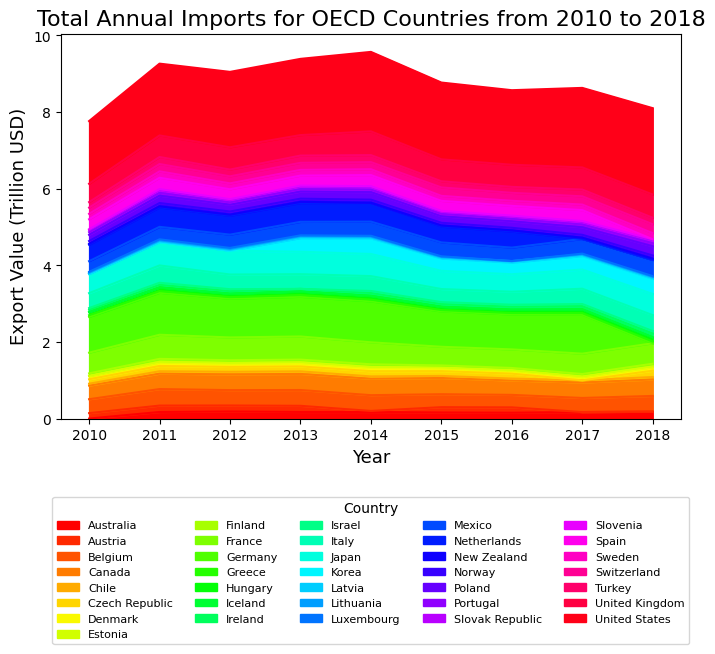

In [40]:
# Create subplot & adjust sizes
fig_1_im, ax = plt.subplots(figsize=(8,5))

# Plot the unstacked exports data (colormap - map each country to a different color)
country_imports.plot(kind='area', stacked=True, ax=ax, colormap='hsv')

# Add titles, labels, legends and adjust fontsize
ax.set_title('Total Annual Imports for OECD Countries from 2010 to 2018', fontsize=16)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Export Value (Trillion USD)', fontsize=13)
ax.legend(title='Country', fontsize=8, bbox_to_anchor=(0.5, -0.6), loc='lower center', ncol=5)

# Set y-axis starting from 0
plt.xticks(rotation=0)
ax.set_ylim(bottom=0)

# Show the chart
plt.show()

# Save chart
fig_1_im.savefig("imports-stacked-area-chart.png")

#### 2. Stacked bar chart - Total Annual imports for each country for each year from 2010 to 2018

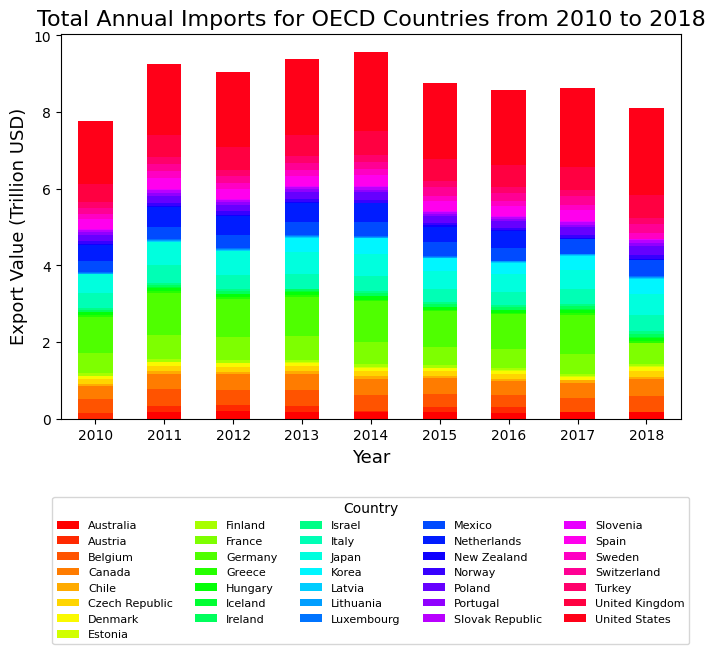

In [41]:
# Create subplot & adjust sizes
fig_2_im, ax = plt.subplots(figsize=(8,5))

# Plot the unstacked exports data (colormap - map each country to a different color)
country_imports.plot(kind='bar', stacked=True, ax=ax, colormap='hsv')

# Add titles, labels, legends and adjust fontsize
ax.set_title('Total Annual Imports for OECD Countries from 2010 to 2018', fontsize=16)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Export Value (Trillion USD)', fontsize=13)
ax.legend(title='Country', fontsize=8, bbox_to_anchor=(0.5, -0.6), loc='lower center', ncol=5)

# Set y-axis starting from 0
plt.xticks(rotation=0)
ax.set_ylim(bottom=0)

# Show the chart
plt.show()

# Save chart
fig_2_im.savefig("imports-stacked-bar-chart.png")

#### 3. Normalized stacked bar chart - Total Annual imports for each country for each year from 2010 to 2018

In [28]:
# Create a copy of the imports data
country_imports_norm = country_imports.copy()

# Add a column 'TOTAL' to sum all country imports by year
country_imports_norm['TOTAL'] = country_imports_norm.sum(axis=1)

# Loop through data to return the % imports of each country/total imports of all country each year
for country in country_imports_norm:
     country_imports_norm[country] = (country_imports_norm[country] / country_imports_norm['TOTAL']) * 100

# Remove column 'TOTAL'
country_imports_norm.drop('TOTAL', axis=1, inplace=True)

country_imports_norm

COUNTRY,Australia,Austria,Belgium,Canada,Chile,Czech Republic,Denmark,Estonia,Finland,France,...,Poland,Portugal,Slovak Republic,Slovenia,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
YEAR,,,,,,,,,,,,,,,,,,,,,
2010,0.000000,1.827480,4.674206,4.574949,0.646765,1.481438,1.022298,0.151288,0.811925,6.961949,...,2.094644,0.891191,0.690649,0.283443,3.361848,1.825560,2.090001,1.851519,6.170109,21.054652
2011,1.851888,1.805178,4.653175,4.342012,0.676588,1.485506,0.997813,0.181679,0.826392,6.793320,...,2.077045,0.788787,0.784140,0.279595,3.188644,1.798091,2.066129,1.982584,6.074198,20.234803
2012,2.053904,1.717269,4.434524,4.540525,0.748020,1.411927,0.976365,0.186263,0.754770,6.575702,...,1.945064,0.680514,0.679714,0.259255,2.848714,1.699641,2.030646,1.953614,6.428711,21.747419
2013,1.839753,1.706904,4.387786,4.472066,0.716419,1.369697,0.974317,0.185017,0.740061,6.431222,...,1.974182,0.682567,0.717149,0.261955,2.771738,1.592769,1.959610,2.015957,5.697530,21.190770
2014,1.790074,0.290189,4.297734,4.486184,0.635246,1.420420,0.959934,0.187748,0.728769,6.003495,...,2.049865,0.685663,0.678507,0.266828,3.021887,1.592385,1.937788,1.913453,6.471747,21.679548
2015,1.806896,1.587528,3.857318,4.824755,0.612224,1.426288,0.905100,0.162176,0.628290,5.551605,...,1.943149,0.679562,0.676152,0.249080,2.966626,1.486824,2.511384,1.834664,6.527024,22.854310
2016,1.771647,1.640046,3.804114,4.365716,0.601086,1.492632,0.917079,0.162899,0.649990,5.658687,...,1.973933,0.725600,0.709758,0.287021,2.969517,1.552384,2.425052,1.812562,6.740233,22.701861
2017,1.977256,0.000000,4.251948,4.671848,0.651938,0.000000,0.989836,0.180343,0.747814,6.156441,...,2.284450,0.825855,0.758844,0.306475,3.293071,1.675112,2.491079,2.043375,6.699238,24.049684
2018,2.206311,0.000000,5.084059,5.297553,0.798990,2.026641,1.156010,0.211894,0.888598,6.593464,...,2.959229,0.983023,0.900545,0.379084,0.000000,1.964794,2.876204,2.082576,7.486176,27.822584


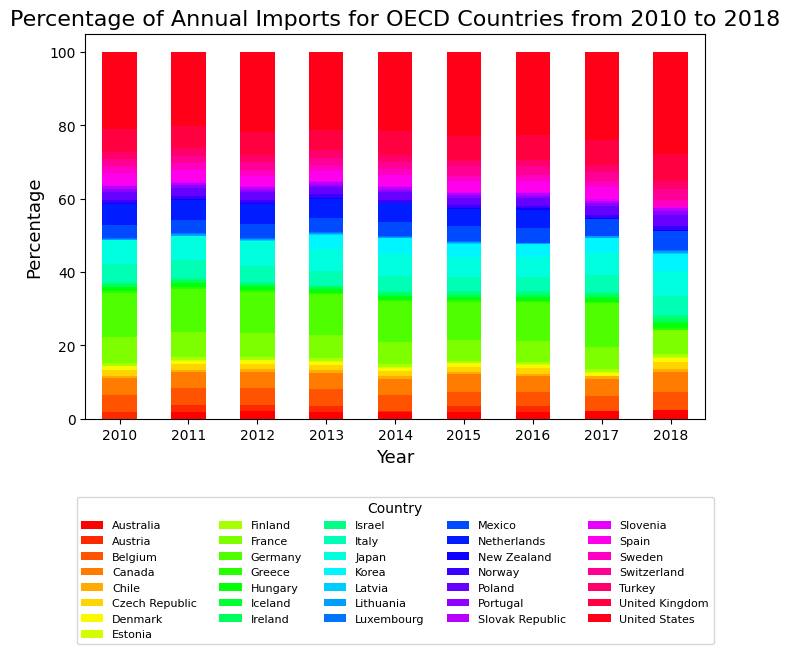

In [42]:
# Create subplot & adjust sizes
fig_3_im, ax = plt.subplots(figsize=(8,5))

# Plot the unstacked exports data (colormap - map each country to a different color)
country_imports_norm.plot(kind='bar', stacked=True, ax=ax, colormap='hsv')

# Add titles, labels, legends and adjust fontsize
ax.set_title('Percentage of Annual Imports for OECD Countries from 2010 to 2018', fontsize=16)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Percentage', fontsize=13)
ax.legend(title='Country', fontsize=8, bbox_to_anchor=(0.5, -0.6), loc='lower center', ncol=5)

# Set y-axis starting from 0
plt.xticks(rotation=0)
ax.set_ylim(bottom=0)

# Show the chart
plt.show()

# Save chart
fig_3_im.savefig("imports-norm-stacked-bar-chart.png")